In [1]:
from _shared import *
from itertools import combinations

## Вопрос

Не сводятся ли формулы обычного среднего и стратфицированного среднего к одному в случае стратифицированного сэмплирования?

> Во-первых, при стратифицированном семплировании оценка стратифицированного среднего равна оценке обычного (выборочного) среднего.

[Стратификация. Как разбиение выборки повышает чувствительность A/B теста](https://habr.com/ru/companies/X5Tech/articles/596279/#:~:text=%D0%92%D0%BE%2D%D0%BF%D0%B5%D1%80%D0%B2%D1%8B%D1%85%2C%20%D0%BF%D1%80%D0%B8%20%D1%81%D1%82%D1%80%D0%B0%D1%82%D0%B8%D1%84%D0%B8%D1%86%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%BD%D0%BE%D0%BC%20%D1%81%D0%B5%D0%BC%D0%BF%D0%BB%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B8%20%D0%BE%D1%86%D0%B5%D0%BD%D0%BA%D0%B0%20%D1%81%D1%82%D1%80%D0%B0%D1%82%D0%B8%D1%84%D0%B8%D1%86%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%BD%D0%BE%D0%B3%D0%BE%20%D1%81%D1%80%D0%B5%D0%B4%D0%BD%D0%B5%D0%B3%D0%BE%20%D1%80%D0%B0%D0%B2%D0%BD%D0%B0%20%D0%BE%D1%86%D0%B5%D0%BD%D0%BA%D0%B5%20%D0%BE%D0%B1%D1%8B%D1%87%D0%BD%D0%BE%D0%B3%D0%BE%20(%D0%B2%D1%8B%D0%B1%D0%BE%D1%80%D0%BE%D1%87%D0%BD%D0%BE%D0%B3%D0%BE)%20%D1%81%D1%80%D0%B5%D0%B4%D0%BD%D0%B5%D0%B3%D0%BE.)

Но тогда почему [Александр Сахнов](https://youtu.be/QiRJM1EPwsQ?t=1351) говорит, что "в некоторых случаях не будет контролироваться ошибка I рода"?
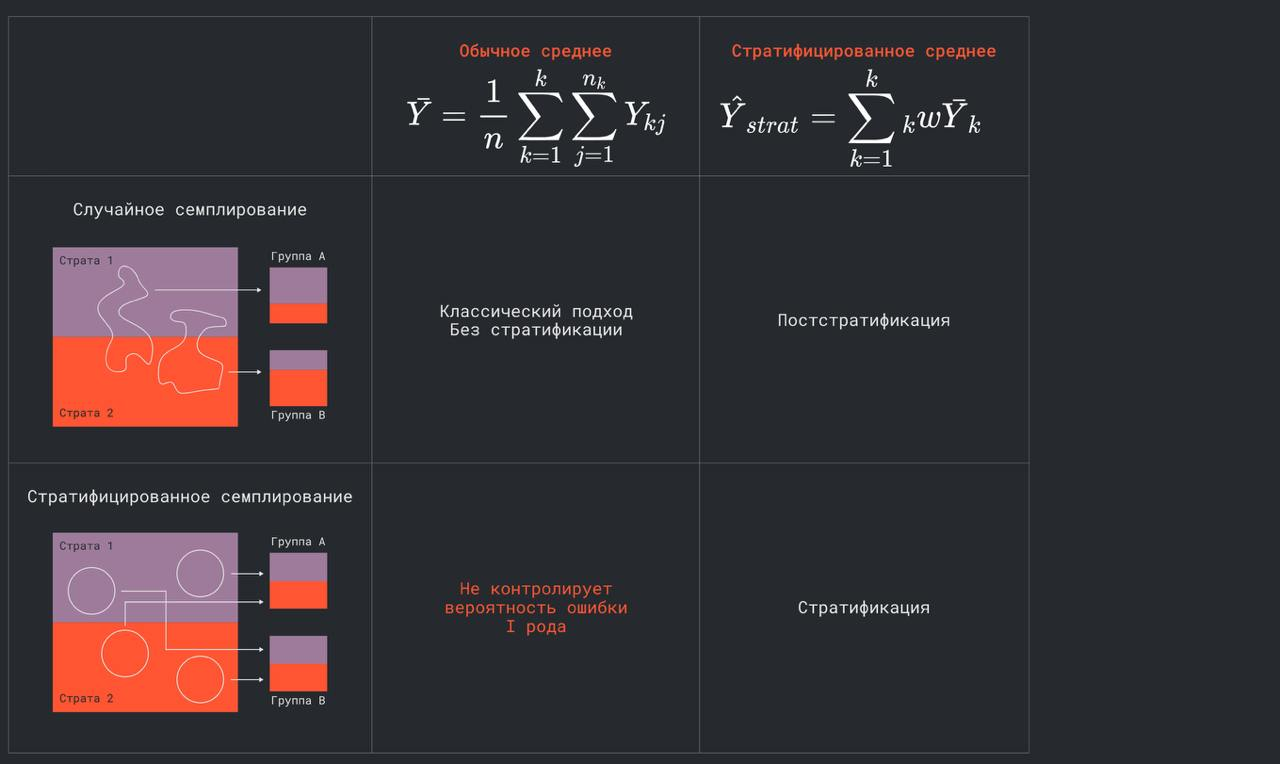

Разницы большой нет: и правда, раз уж они дают один теоретический результат и мы уже построили систему сплитования, то и стратифицированное среднее рассчитать не должно составить труда.

Но всё же...

[Ответ от 2024.04.12](https://t.me/c/1734967993/345):
> Добрый день! Дисперсия будет разной. Если быть более точным в формулировках, то скорее это относится к способу построения ДИ


## Задача  1. Разбиение на страты

Предположим, у нас есть набор признаков, которые вычисляются независимо от эксперимента. Используя эти признаки, нужно разбить объекты на страты так, чтобы дисперсия стратифицированного среднего была минимальна и доля каждой страты была не менее 5% от всех данных.

Данные разбиты на 2 части. Первая часть доступна для исследования по ссылке `stratification_task_data_public.csv`. Решение будет проверяться на второй части данных.
Значения в столбцах:
- `x1, ..., x10` — признаки, которые можно использовать для вычисления страт.
- Значения в столбце y — измерения, по которым будет вычисляться целевая метрика эксперимента.

Подходы формирования страт можно посмотреть в блокноте (`08_Stratification_ex1`).

Дисперсия должна не превышать 50,000.

### EDA

In [2]:
import pandas as pd
import numpy as np


def get_strats(df_features):
    """Возвращает страты объектов.

    :param df_features (pd.DataFrame): таблица с признаками x1,...,x10
    :return (list | np.array | pd.Series): список страт объектов размера len(df).
    """
    pass

In [3]:
filename = 'stratification_task_data_public.csv'

# df = read_from_database(filename)
df = pd.read_csv('./data/{}'.format(filename))
df.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,y
0,0.869,30,33.8,0,1,0.2,1992,1,1,1,1903
1,0.759,27,21.7,2,0,3.5,1995,1,1,2,1313
2,0.456,29,37.6,2,0,3.1,1993,0,0,0,1484
3,0.060,35,27.5,2,0,4.7,1988,0,0,1,1188
4,0.939,19,30.7,0,0,3.6,2003,1,1,2,842


In [4]:
# df.info()
# df.describe()
# corrs = df.corr(numeric_only=True)

# corrs[corrs>0.05]

In [5]:
s_nuniq = df.nunique()
s_nuniq

x1     1001
x2       36
x3      414
x4        3
x5        2
x6      238
x7       35
x8        2
x9        2
x10       9
y      1313
dtype: int64

In [6]:
categories = s_nuniq[s_nuniq < 10]
categories_list = categories.index.to_list()

categories

x4     3
x5     2
x8     2
x9     2
x10    9
dtype: int64

In [7]:
df.loc[:, categories_list].value_counts()

x4  x5  x8  x9  x10
0   0   1   1   1      223
1   0   1   1   1      219
2   0   1   1   2      214
1   0   1   1   2      206
0   0   1   1   2      194
                      ... 
1   1   0   0   7        1
        1   1   7        1
2   0   0   0   7        1
        1   0   7        1
    1   1   1   8        1
Length: 192, dtype: int64

In [8]:
df.loc[:, categories_list[1:-1]].value_counts()

x5  x8  x9
0   1   1     2341
1   1   1     1611
0   1   0     1501
    0   1     1261
1   1   0     1052
0   0   0      823
1   0   1      817
        0      594
dtype: int64

In [9]:
def calc_strat_params(df, strat):
    """Вычисляет стратифицированную дисперсию и минимальную долю страт."""
    strat_variances = df.groupby(strat)['y'].var()
    weights = df[strat].value_counts(normalize=True) 
    
    stratified_variance = (strat_variances * weights).sum()
    # min_perc = weights.min()
    
    return (stratified_variance, weights.min(), weights.max())


def print_strat_params(stratified_variance, min_perc, max_perc):
    print('Stratified Variance is {:,.2f}; minimal and maximal strata percentages are {:.2%} and {:.2%}.'.format(
        stratified_variance,
        min_perc,
        max_perc
    ))

In [10]:
df_features = df.drop('y', axis=1)
df['strat'] = get_strats(df_features)

stratified_variance, min_perc, max_perc = calc_strat_params(df, 'y')
print_strat_params(stratified_variance, min_perc, max_perc)

Stratified Variance is 0.00; minimal and maximal strata percentages are 0.01% and 0.27%.


In [11]:
strat_params = {}

categories_combinations = []
for r in range(1, len(categories_list)+1):
    categories_combinations.extend(combinations(categories_list, r))

for (i, category) in enumerate(categories_combinations):
    if len(category) == 1:
        categories_combinations[i] = category[0]
    else:
        categories_combinations[i] = list(category)
        
# categories_combinations

In [12]:
for category in categories_combinations:
    strat_params["".join(category)] = calc_strat_params(df, category)

strat_params = pd.DataFrame(
    data=strat_params.values(),
    columns=['stratified_variance', 'min_perc', 'max_perc'],
    index=strat_params.keys()
)

strat_params.sort_values(by=['stratified_variance', 'min_perc'], ascending=[True, True])#.head(10)

,stratified_variance,min_perc,max_perc
x4x5x8x9x10,60039.764917,0.0001,0.0223
x5x8x9x10,60061.210118,0.0001,0.0629
x4x5x9x10,61224.574695,0.0001,0.0352
x5x9x10,61232.136518,0.0001,0.0964
x4x8x9x10,62411.711323,0.0001,0.0375
x5x8x9,62420.873232,0.0594,0.2341
x4x5x8x9,62428.995532,0.0183,0.0803
x8x9x10,62449.772939,0.0003,0.1046
x5x8x10,62523.108677,0.0003,0.1052
x4x5x8x10,62536.090560,0.0001,0.0372


### Неудачные попытки

In [13]:
stratas = categories_list
# stratas = ['x8', 'x9', 'x10']

stratas, calc_strat_params(df, stratas)

(['x4', 'x5', 'x8', 'x9', 'x10'], (60039.76491737865, 0.0001, 0.0223))

In [14]:
df[stratas].value_counts(normalize=True).sort_index()

x4  x5  x8  x9  x10
0   0   0   0   0      0.0041
                1      0.0073
                2      0.0076
                3      0.0044
                4      0.0028
                        ...  
2   1   1   1   3      0.0103
                4      0.0052
                5      0.0031
                6      0.0012
                8      0.0001
Length: 192, dtype: float64

In [15]:
df_agg = (
    df
    .groupby(stratas)
    ['y'].agg(['mean', 'var', 'count'])
    # .reset_index()
)

df_agg['percentage'] = df_agg['count'] / df_agg['count'].sum()

df_agg

mean            var  count  percentage
x4 x5 x8 x9 x10                                               
0  0  0  0  0    1375.512195  102169.806098     41      0.0041
            1    1326.561644   44614.416286     73      0.0073
            2    1379.394737   70273.628772     76      0.0076
            3    1413.227273   40097.528541     44      0.0044
            4    1534.142857   25660.793651     28      0.0028
...                      ...            ...    ...         ...
2  1  1  1  3    1507.262136   73514.979631    103      0.0103
            4    1515.807692   47678.903469     52      0.0052
            5    1499.806452   39778.561290     31      0.0031
            6    1536.750000   50784.022727     12      0.0012
            8    1730.000000            NaN      1      0.0001

[192 rows x 4 columns]

In [16]:
df_agg.sort_values(by='mean')

mean           var  count  percentage
x4 x5 x8 x9 x10                                              
2  1  1  0  8     837.000000           NaN      1      0.0001
0  1  1  0  8    1088.000000           NaN      1      0.0001
1  1  0  0  1    1108.408163  78580.704932     49      0.0049
0  1  0  0  0    1175.923077  39231.833846     26      0.0026
   0  0  1  0    1182.217391  71276.643223     69      0.0069
...                      ...           ...    ...         ...
      1  0  7    1660.000000    512.000000      2      0.0002
   1  1  1  8    1690.000000           NaN      1      0.0001
2  1  1  1  8    1730.000000           NaN      1      0.0001
1  1  0  1  7    1780.500000      4.500000      2      0.0002
0  1  1  1  7    2023.000000  84050.000000      2      0.0002

[192 rows x 4 columns]

In [17]:
df_agg['mean_strata'] = df_agg['mean'].round(-1)

df_agg2 = df_agg.groupby('mean_strata')['count'].sum().reset_index()
df_agg2['percentage'] = df_agg2['count'] / df_agg2['count'].sum()

df_agg2

,mean_strata,count,percentage
0,840.0,1,0.0001
1,1090.0,1,0.0001
2,1110.0,49,0.0049
3,1180.0,95,0.0095
4,1200.0,3,0.0003
5,1210.0,101,0.0101
6,1220.0,378,0.0378
7,1230.0,1,0.0001
8,1240.0,45,0.0045
9,1250.0,134,0.0134


In [18]:
df_agg['mean_round'] = df_agg['mean'].round(-1)

# intervals = (0, 1220, 1270, 1290, 1300, 1330, 1360, 1370, 1380, 1390, 1410, 1430, 1460, 1500, 2020, 9999)
intervals = (0, 1300, 1360, 1390, 1410, 1460, 1500, 2020)

strata_values = [
    df_agg[(df_agg['mean_round'] > intervals[i]) & (df_agg['mean_round'] <= intervals[i+1])].index.to_list()
    for i in range(len(intervals) - 2)
]

# strata_values

In [19]:
# (df[stratas] == (1, 1, 1, 1)).apply(lambda xs: np.array([x for x in xs]).all(), axis=1).value_counts()

df['strata'] = -1

for (i, sv) in enumerate(strata_values):
    for v in sv:
        df.loc[
            (df[stratas] == v).apply(lambda xs: np.array([x for x in xs]).all(), axis=1),
            'strata'
        ] = i
        
df['strata'].value_counts(normalize=True)

 0    0.2750
 2    0.2163
 1    0.1744
 4    0.1198
 3    0.0802
 5    0.0741
-1    0.0602
Name: strata, dtype: float64

In [20]:
stratified_variance, min_perc, max_perc = calc_strat_params(df, 'strata')
print_strat_params(stratified_variance, min_perc, max_perc)

Stratified Variance is 59,620.02; minimal and maximal strata percentages are 6.02% and 27.50%.


### Более удачные попытки

In [21]:
df = pd.read_csv('./data/{}'.format(filename))
categories_list = df.columns[:-1].to_list()

categories_list

['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10']

In [22]:
strat_params = {}

for category in categories_list:
    strat_params[category] = calc_strat_params(df, category)

strat_params = pd.DataFrame(
    data=strat_params.values(),
    columns=['stratified_variance', 'min_perc', 'max_perc'],
    index=strat_params.keys()
)

strat_params.sort_values(by=['stratified_variance', 'min_perc'], ascending=[True, True])#.head(10)

,stratified_variance,min_perc,max_perc
x2,47232.075241,0.0001,0.0862
x7,48054.669337,0.0001,0.0864
x10,63755.711464,0.0007,0.2702
x3,64390.510806,0.0001,0.0069
x8,64858.815656,0.3495,0.6505
x6,65713.855316,0.0001,0.0263
x5,66021.751410,0.4074,0.5926
x9,66050.549744,0.3970,0.6030
x4,66054.371201,0.3261,0.3371
x1,66233.928543,0.0002,0.0023


In [31]:
stratas = 'x2'

stratas, calc_strat_params(df, stratas)

('x2', (47232.07524083465, 0.0001, 0.0862))

In [32]:
df[stratas].value_counts(normalize=True).sort_index()

12    0.0002
15    0.0002
16    0.0008
17    0.0009
18    0.0024
19    0.0040
20    0.0074
21    0.0132
22    0.0196
23    0.0281
24    0.0393
25    0.0492
26    0.0605
27    0.0721
28    0.0835
29    0.0846
30    0.0862
31    0.0848
32    0.0778
33    0.0669
34    0.0574
35    0.0436
36    0.0348
37    0.0273
38    0.0214
39    0.0120
40    0.0093
41    0.0047
42    0.0041
43    0.0020
44    0.0006
45    0.0004
46    0.0003
47    0.0002
48    0.0001
49    0.0001
Name: x2, dtype: float64

In [33]:
df_agg = (
    df
    .groupby(stratas)
    ['y'].agg(['mean', 'var', 'count'])
    # .reset_index()
)

df_agg['percentage'] = df_agg['count'] / df_agg['count'].sum()

df_agg

,mean,var,count,percentage
x2,,,,
12,572.500000,122512.500000,2,0.0002
15,677.500000,26220.500000,2,0.0002
16,746.750000,25622.214286,8,0.0008
17,897.777778,65721.944444,9,0.0009
18,950.291667,46386.041667,24,0.0024
19,1107.700000,58148.112821,40,0.0040
20,1058.162162,48220.877453,74,0.0074
21,1094.780303,46120.386479,132,0.0132
22,1146.612245,46553.048875,196,0.0196


In [34]:
df_agg.sort_values(by='mean')

,mean,var,count,percentage
x2,,,,
47,518.000000,61250.000000,2,0.0002
12,572.500000,122512.500000,2,0.0002
15,677.500000,26220.500000,2,0.0002
49,684.000000,NaN,1,0.0001
45,740.500000,22913.666667,4,0.0004
16,746.750000,25622.214286,8,0.0008
43,771.900000,51621.673684,20,0.0020
46,851.666667,33312.333333,3,0.0003
17,897.777778,65721.944444,9,0.0009


In [35]:
df_agg['mean_round'] = df_agg['mean'].round(-2)

df_agg2 = df_agg.groupby('mean_round')['count'].sum().reset_index()
df_agg2['percentage'] = df_agg2['count'] / df_agg2['count'].sum()

df_agg2

,mean_round,count,percentage
0,500.0,2,0.0002
1,600.0,2,0.0002
2,700.0,15,0.0015
3,800.0,20,0.0020
4,900.0,12,0.0012
5,1000.0,119,0.0119
6,1100.0,869,0.0869
7,1200.0,902,0.0902
8,1300.0,2500,0.2500
9,1400.0,2168,0.2168


In [40]:
intervals = (0, 1200, 1300, 1400, 9999)

for i in range(len(intervals) - 1):
    print('(df > {}) & (df <= {})'.format(intervals[i], intervals[i+1]))

strata_values = [
    df_agg[(df_agg['mean_round'] > intervals[i]) & (df_agg['mean_round'] <= intervals[i+1])].index.to_list()
    for i in range(len(intervals) - 1)
]

# strata_values

(df > 0) & (df <= 1200)
(df > 1200) & (df <= 1300)
(df > 1300) & (df <= 1400)
(df > 1400) & (df <= 9999)


In [41]:
# (df[stratas] == (1, 1, 1, 1)).apply(lambda xs: np.array([x for x in xs]).all(), axis=1).value_counts()

df['strata'] = -1

for (i, sv) in enumerate(strata_values):
    for v in sv:
        df.loc[
            df[stratas] == v,
            'strata'
        ] = i
        
df[[stratas, 'strata']].value_counts(normalize=True)

x2  strata
30  3         0.0862
31  3         0.0848
29  3         0.0846
28  3         0.0835
32  2         0.0778
27  2         0.0721
33  2         0.0669
26  1         0.0605
34  1         0.0574
25  1         0.0492
35  1         0.0436
24  1         0.0393
36  0         0.0348
23  0         0.0281
37  0         0.0273
38  0         0.0214
22  0         0.0196
21  0         0.0132
39  0         0.0120
40  0         0.0093
20  0         0.0074
41  0         0.0047
42  0         0.0041
19  0         0.0040
18  0         0.0024
43  0         0.0020
17  0         0.0009
16  0         0.0008
44  0         0.0006
45  0         0.0004
46  0         0.0003
47  0         0.0002
12  0         0.0002
15  0         0.0002
48  0         0.0001
49  0         0.0001
dtype: float64

In [56]:
stratified_variance, min_perc, max_perc = calc_strat_params(df, 'strata')
print_strat_params(stratified_variance, min_perc, max_perc)

Stratified Variance is 49,648.21; minimal and maximal strata percentages are 19.41% and 33.91%.


In [78]:
print(stratas)

mapping = np.zeros(df['x2'].max()+1).astype(int)

for (x2_val, strata_val) in df[[stratas, 'strata']].value_counts().sort_index().index.to_list():
    mapping[x2_val] = strata_val
    
mapping

x2


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 2, 3, 3, 3, 3, 2, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

In [80]:
import pandas as pd
import numpy as np


def get_strats(df_features):
    """Возвращает страты объектов.

    :param df_features (pd.DataFrame): таблица с признаками x1,...,x10
    :return (list | np.array | pd.Series): список страт объектов размера len(df).
    """
    # mapping = np.zeros(df['x2'].max()+1).astype(int)
    # for (x2_val, strata_val) in df[[stratas, 'strata']].value_counts().sort_index().index.to_list():
    #     mapping[x2_val] = strata_val
        
    mapping = np.array([
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 1, 1, 2, 3, 3, 3, 3, 2, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0
    ])
    
    return df_features['x2'].apply(lambda x: mapping[x])

In [82]:
df_features = df.drop('y', axis=1)
df['strat'] = get_strats(df_features)

stratified_variance, min_perc, max_perc = calc_strat_params(df, 'x2')
print_strat_params(stratified_variance, min_perc, max_perc)
# print('Minimal stratified variance before was {:,.2f}'.format(strat_params['stratified_variance'].min()))

Stratified Variance is 47,232.08; minimal and maximal strata percentages are 0.01% and 8.62%.
Minimal stratified variance before was 47,232.08


In [86]:
"""
> Решение
  

Дисперсия стратифицированного среднего станет меньше, если средние значения страт будут отличаться. Нужно было найти зависимости признаков с метрикой и разбить на страты так, чтобы средние значения метрики в стратах отличались как можно сильнее.

Возможный вариант решения:
"""
def get_strats(df_features):
    return [
        str(int(26 <= x <= 34)) + str(int(28 <= x <= 32)) + str(int(y > 1)) + str(int(a == b))
        for x, y, a, b in df_features[['x2', 'x10', 'x5', 'x9']].values
    ]


df_features = df.drop('y', axis=1)
df['strat'] = get_strats(df_features)

stratified_variance, min_perc, max_perc = calc_strat_params(df, 'strat')
print_strat_params(stratified_variance, min_perc, max_perc)
# var=46928, min_part=5.03%

Stratified Variance is 46,928.46; minimal and maximal strata percentages are 5.03% and 12.98%.


In [89]:
"""
> Решение с ML
  

Если не придумывать осмысленное разбиение на страты, а стараться максимально снизить дисперсию,
то можно использовать следующий подход:

1. Построить модель, которая по признакам прогнозирует значение метрики.

2. По прогнозным значениям разбить объекты на страты.
С маленькими значениями прогноза в одну страту, с большими — в другую.

При качественной реализации такой подход даёт большее снижение дисперсии стратифицированного среднего.
Но его сложнее реализовать и интерпретировать.
Подробно рассматривать способ построения предсказания не будем, так как это за рамками нашего курса.

С помощью такого подхода в нашей задаче можно снизить дисперсию примерно до 42000.
"""

from lightgbm import LGBMRegressor

df_train = df.iloc[:len(df) // 2].copy()
df_test = df.iloc[len(df) // 2:].copy()

model = LGBMRegressor(num_leaves=3)
feature_names = [f'x{i}' for i in range(1, 11)]
model.fit(df_train[feature_names].values, df_train['y'].values)
predict_test = model.predict(df_test[feature_names].values)

n_strat = 10
quantiles = np.quantile(predict_test, np.linspace(0, 1 - 1 / n_strat, n_strat))
df_test['strat'] = [np.sum(predict >= quantiles) for predict in predict_test]

stratified_variance, min_perc, max_perc = calc_strat_params(df_test, 'strat')
print_strat_params(stratified_variance, min_perc, max_perc)
# var=42,289, min_part=9.98%

Stratified Variance is 42,289.24; minimal and maximal strata percentages are 9.98% and 10.02%.


## Задача 2. Функция стратифицированного распределения клиентов по группам

Допустим, мы заранее определили множество клиентов, которые будут участвовать в эксперименте. Их страты известны. Нужно написать функцию, которая будет стратифицировано распределять их по группам.

Распределение по группам будем считать стратифицированным, если для каждой страты количество клиентов этой страты в группах отличаются не более, чем на 1.

Реализуйте функцию `split_stratified`.

In [ ]:
import numpy as np
import pandas as pd


def split_stratified(strats):
    """Распределяет объекты по группам (контрольная и экспериментальная).

    :param strats (np.array): массив с разбиением на страты.
    :return groups (np.array): массив из 0 и 1,
        0 - контрольная группа, 1 - экспериментальная.
    """
    df_split = pd.Series(strats).reset_index()
    df_split.columns = ['index', 'strat']
    
    df_split['group'] = 0
    
    df_split['rnk'] = (
        df_split
        #.sample(frac=1.0, replace=False)
        ['strat'].reset_index()
        .groupby('strat')
        ['index'].rank()
    )
    
    freqs = df_split['strat'].value_counts()
    for freq in freqs.index:
        df_split.loc[
            (df_split['strat'] == freq) & (df_split['rnk'] > freqs[freq] // 2),
            'group'
        ] = 1
    
    return df_split.sort_index()['group']

In [ ]:
df = pd.DataFrame({'strat': [1, 2, 2, 2, 1, 1, 1, 3, 3]})
df['group'] = split_stratified(df['strat'].values)
# df = pd.DataFrame({
#   'strat': [1, 2, 2, 2, 1, 1, 1, 3, 3],
#   'group': [1, 0, 0, 1, 0, 0, 1, 0, 1]
# })
df

In [ ]:
df['group'].value_counts()

In [ ]:
# Solution (more efficient and more random)
import numpy as np


def split_stratified_sol(strats):
    indexes = np.arange(len(strats))
    b_indexes = []
    for strat in np.unique(strats):
        indexes_strat = indexes[strats == strat]
        size_strat = len(indexes_strat)
        # случайную половину индексов страты определяем в экспериментальную группу
        b_indexes += np.random.choice(indexes_strat, size_strat//2, False).tolist()
    groups = np.zeros(len(strats), dtype=int)
    groups[b_indexes] = 1
    return groups


df['group2'] = split_stratified_sol(df['strat'].values)
# df = pd.DataFrame({
#   'strat': [1, 2, 2, 2, 1, 1, 1, 3, 3],
#   'group': [1, 0, 0, 1, 0, 0, 1, 0, 1]
# })
df

## Задача 3. Функция для оценки эксперимента с применением постстратификации

In [ ]:
"""
Реализуйте функцию get_ttest_strat_pvalue.

 

Шаблон решения
"""

import numpy as np
import pandas as pd
from scipy import stats


def calc_strat_stats(df, weight):
    df_agg = df.groupby('strat')['metric'].agg(['mean', 'var'])
    df_agg.columns = ['mean', 'var']
    
    df_agg_w = df_agg.merge(
        right=weight,
        how='inner',
        left_index=True,
        right_index=True
    )
    # Re-normalizing:
    df_agg_w['weight'] = df_agg_w['weight'] / df_agg_w['weight'].sum()
    
    strat_mean = (df_agg_w['weight'] * df_agg_w['mean']).sum()
    strat_var = (df_agg_w['weight'] * df_agg_w['var']).sum()
    
    return (strat_mean, strat_var)


def get_ttest_strat_pvalue(metrics_strat_a_group, metrics_strat_b_group):
    """Применяет постстратификацию, возвращает pvalue.

    Веса страт считаем по данным обеих групп.
    Предполагаем, что эксперимент проводится на всей популяции.
    Веса страт нужно считать по данным всей популяции.

    :param metrics_strat_a_group (np.ndarray): значения метрик и страт группы A.
        shape = (n, 2), первый столбец - метрики, второй столбец - страты.
    :param metrics_strat_b_group (np.ndarray): значения метрик и страт группы B.
        shape = (n, 2), первый столбец - метрики, второй столбец - страты.
    :return (float): значение p-value
    """
    columns_ = ['metric', 'strat']

    df_a = pd.DataFrame(metrics_strat_a_group, columns=columns_)
    df_a['group'] = 'a'

    df_b = pd.DataFrame(metrics_strat_b_group, columns=columns_)
    df_b['group'] = 'b'

    df_ab = pd.concat([df_a, df_b])
    
    weight = pd.Series(df_ab.value_counts(normalize=True), name='weight')

    
    strat_mean_a, strat_var_a = calc_strat_stats(df_a, weight)
    strat_mean_b, strat_var_b = calc_strat_stats(df_b, weight)

    strat_mean_diff = strat_mean_b - strat_mean_a
    strat_std_mean = (strat_var_b / len(df_b) + strat_var_a / len(df_a)) ** 0.5
    
    t = strat_mean_diff / strat_std_mean
    pvalue = (1 - stats.norm.cdf(np.abs(t))) * 2

    return pvalue

In [ ]:
metrics_strat_a_group = np.array([
  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
  [0, 0, 0, 0, 1, 1, 1, 1, 1, 1]
]).T
metrics_strat_b_group = np.array([
  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
  [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]
]).T
pvalue = get_ttest_strat_pvalue(metrics_strat_a_group, metrics_strat_b_group)
# pvalue = 0.037056
print('{:.6f}'.format(pvalue))

In [ ]:
# Solution (is identical)

import numpy as np
import pandas as pd
from scipy import stats


def calc_strat_mean_var(df, weights):
    """Считает стратифицированное среднее и стратифицированную дисперсию.

    :param df (pd.DataFrame): датафрейм с целевой метрикой и данными для стратификации
    :param weights (pd.Series): маппинг {название страты: вес страты в популяции}
    :return strat_mean, strat_var (float, float): стратифицированное среднее и
        стратифицированная дисперсия
    """
    strat_means = df.groupby('strat')['metric'].mean()
    strat_mean = (strat_means * weights).sum()
    strat_vars = df.groupby('strat')['metric'].var()
    strat_var = (strat_vars * weights).sum()
    return strat_mean, strat_var

def get_ttest_strat_pvalue(metrics_strat_a_group, metrics_strat_b_group):
    weights = (
        pd.Series(np.hstack((metrics_strat_a_group[:, 1], metrics_strat_b_group[:, 1],)))
        .value_counts(normalize=True)
    )
    a = pd.DataFrame(metrics_strat_a_group, columns=['metric', 'strat'])
    b = pd.DataFrame(metrics_strat_b_group, columns=['metric', 'strat'])
    a_strat_mean, a_strat_var = calc_strat_mean_var(a, weights)
    b_strat_mean, b_strat_var = calc_strat_mean_var(b, weights)
    delta = b_strat_mean - a_strat_mean
    std = (a_strat_var / len(a) + b_strat_var / len(b)) ** 0.5
    t = delta / std
    pvalue = 2 * (1 - stats.norm.cdf(np.abs(t)))
    return pvalue